In [1]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys
import glob
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams.update({'font.size': 12})

### Getting data from Francoise folder

In [2]:
root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'
# 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 
# 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'Time AU', 
# 'Non-decided', 'Reactants', 'Products', 
# 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3', 'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'

### Positions

In [3]:
pos_folder = os.path.join(root, 'positions')
all_files_abs = [ os.path.join(pos_folder, x) for x in sorted(os.listdir(pos_folder))]
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

NameError: name 'all_dfs' is not defined

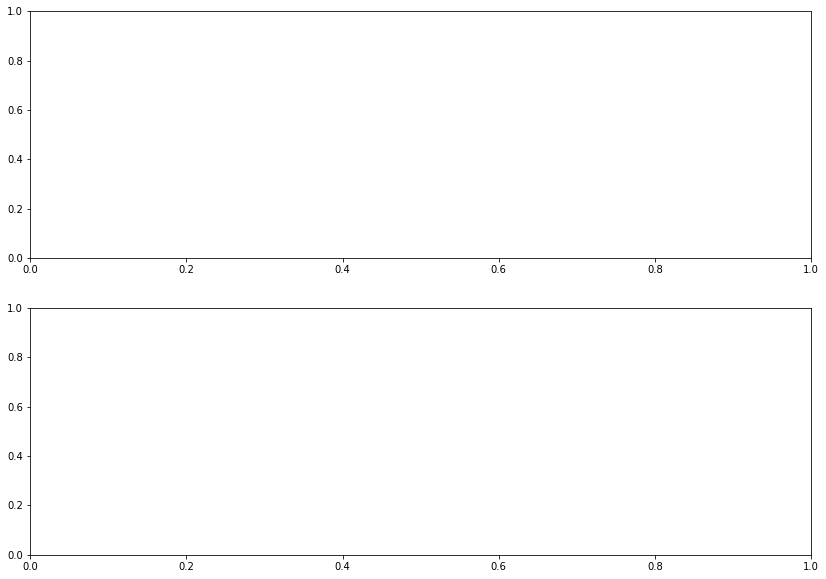

In [4]:
from matplotlib.lines import Line2D
positionpopulation_out = os.path.join(manu_root,'positionpopulation.png')

fig, [ax0,ax1] = plt.subplots(2,1,figsize = (14,10))
time = all_dfs[0]['fs']

labels = ['Pos1','Pos2','Pos3','Pos4','Pos5']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']

for i, run in enumerate(all_dfs):
    lab = '{}'.format(labels[i])
    ax0.plot(time, run['S0'] + run['P(t) S0'], color = colors[i], label=lab)
    ax0.plot(time, run['S1'], color = colors[i])
    
    
    ax1.plot(time, run['Reactants'],color = colors[i], ls = ':')
    ax1.plot(time, run['Products'] + run['P(t) S0'],color = colors[i],)

ax0.set_ylabel(r'Fraction of Population')
ax1.set_ylabel(r'Fraction of $S_0$')
ax1.set_xlabel('fs')
ax0.legend()
ax0.set_title(r'$S_1$ and $S_0$ population')
ax1.set_title(r'Reactants and products')

custom_lines = [Line2D([0], [0], color='k', ls=':'), Line2D([0], [0], color='k')]
ax1.legend(custom_lines,['Reactants','Products'])
                                                            
fig.tight_layout()
fig.savefig(positionpopulation_out)

# Figures for the different runs

In [5]:
folders = ['FC', 'IR_INV', 'IR_LON', 'IR_NOR', 'UV', '2-3']
all_files_abs = [ os.path.join(os.path.join(root,x),x)+'.txt' for x in folders ]
print(all_files_abs)
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs ]
print(all_dfs[0].keys())

['/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/FC/FC.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_INV/IR_INV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_LON/IR_LON.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_NOR/IR_NOR.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/UV/UV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/2-3/2-3.txt']
Index(['steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total',
       'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3',
       'S4', 'S5', 'S6', 'S7', 'Time AU', 'Non-decided', 'Reactants',
       'Products', 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3',
       'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'],
      dtype='object')


/home/alessio/u-3dPropagation_manuscript/Report/images/graph-FC.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-INV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-LON.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-NOR.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-UV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-2-3.png


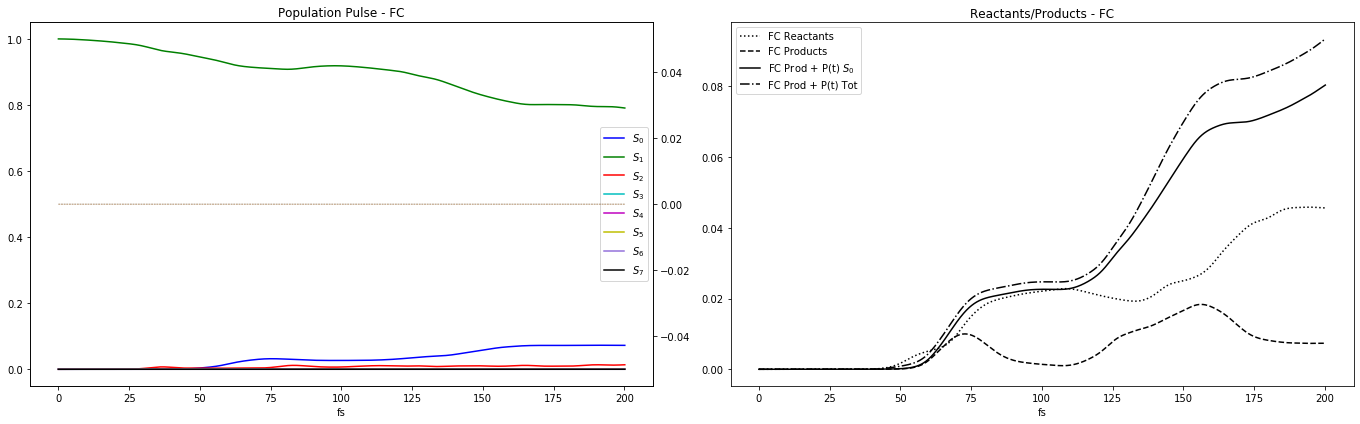

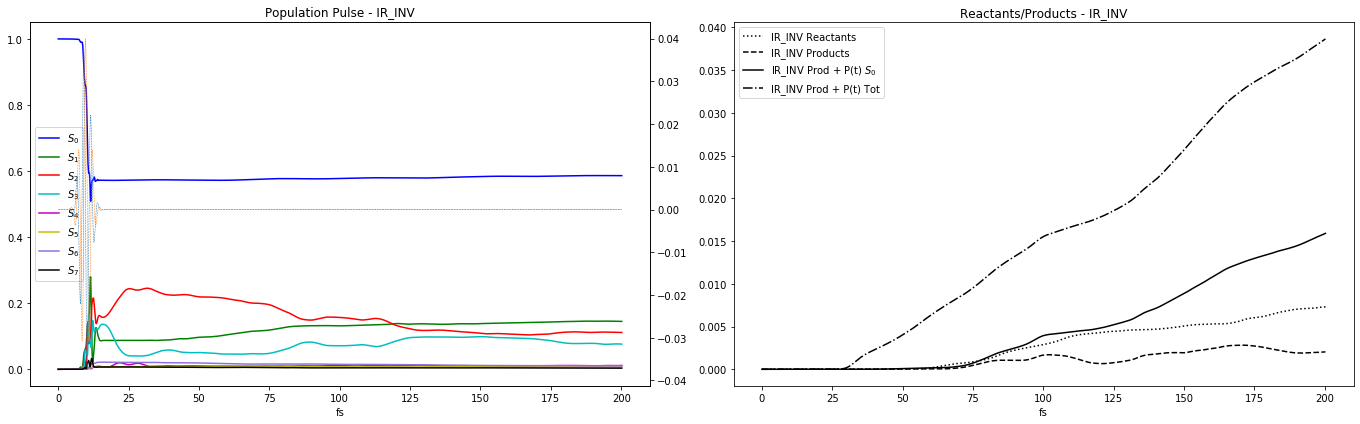

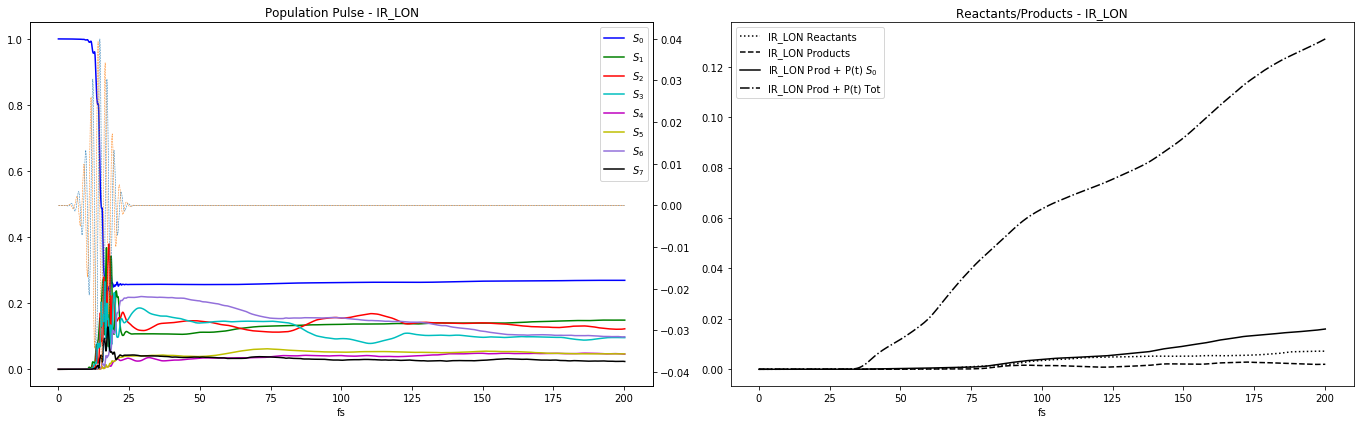

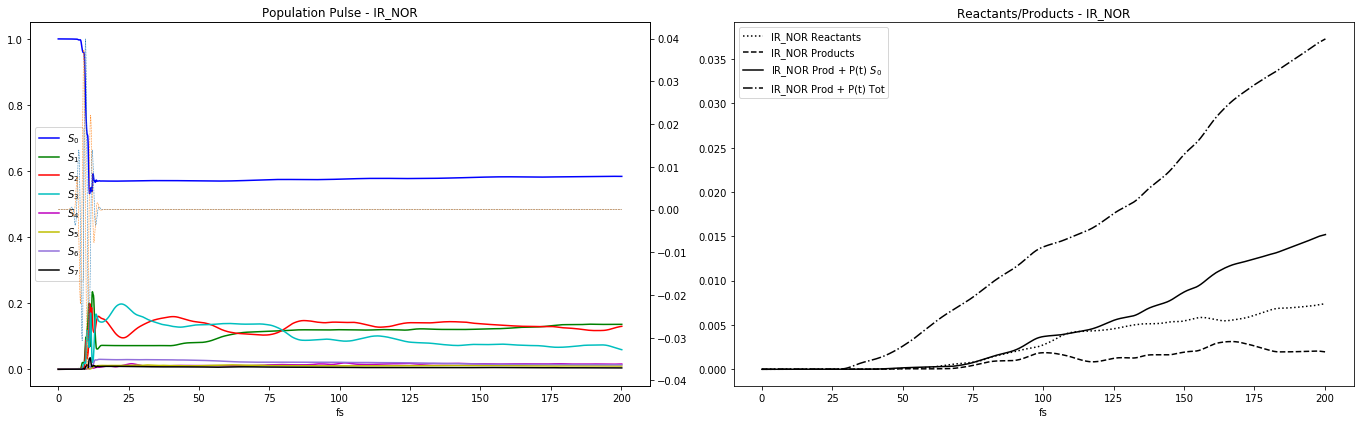

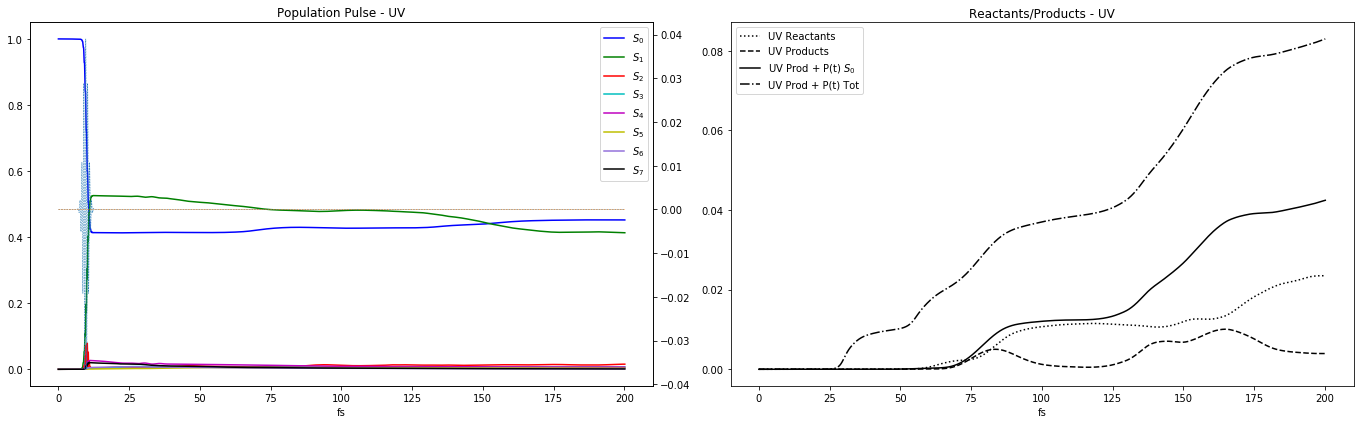

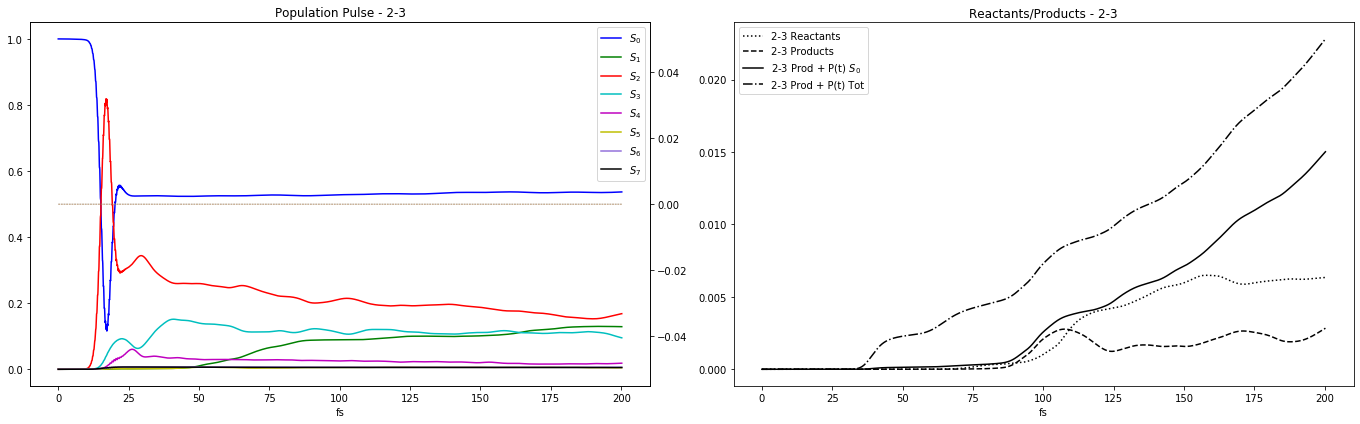

In [6]:
for jjj in range(len(folders)):

    this_df = all_dfs[jjj]

    fig, [ax0, ax1] = plt.subplots(1,2,figsize=(19,6))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'mediumpurple', 'k']

    labelz = folders[jjj]

    for ind in range(8):
        kkey = 'S{}'.format(ind)
        true_label = r'$S_{}$'.format(ind)
        ax0.plot(this_df['fs'], this_df[kkey], label=true_label, color=colors[ind])

    ax00 = ax0.twinx()
    ax00.plot(this_df['fs'], this_df['Xpulse'], label='X_pulse', ls='--', lw=.5)
    ax00.plot(this_df['fs'], this_df['Ypulse'], label='Y_pulse', ls='--', lw=.5)
    ax0.set_title('Population Pulse - {}'.format(labelz))
    #ax0.set_xlim(0,50)
    ax0.set_xlabel('fs')
    ax0.legend()
    
    ax1.plot(this_df['fs'],  this_df['Reactants']   , label='{} Reactants'.format(labelz),ls = ':', color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products']    , label='{} Products'.format(labelz) , ls='--',  color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) S0'], label=r'{} Prod + P(t) $S_0$'.format(labelz), color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) Tot'], label=r'{} Prod + P(t) Tot'.format(labelz), ls = '-.',  color=colors[ind])
    ax1.set_title('Reactants/Products - {}'.format(labelz))
    ax1.set_xlabel('fs')
    ax1.legend()

    fig.tight_layout()
    output_name = os.path.join(manu_root,'graph-{}.png'.format(labelz.replace('_','-')))
    print(output_name)
    fig.savefig(output_name)

# Figures for the in between bonds

In [8]:
%matplotlib ipympl


folder_bb = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
subfolders = ['UV', 'IR_LON', 'IR_NOR', '2-3']
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'

for this in subfolders:
    abs_path = os.path.join(folder_bb, this)
    filename_abs = os.path.join(manu_root, '{}-in-between.png'.format(this.replace('_','-')))
    print(filename_abs)
    active_withs0 = os.path.join(abs_path, '{}_BONDS_r_c_1.4-non-overlapping_ACTIVE_with_s0.txt'.format(this))
    all_withs0 = os.path.join(abs_path,    '{}_BONDS_r_c_1.4-non-overlapping_ALL_with_s0.txt'.format(this))
    active_nos0 = os.path.join(abs_path,   '{}_BONDS_r_c_1.4-non-overlapping_ACTIVE_no_s0.txt'.format(this))
    all_nos0 = os.path.join(abs_path,      '{}_BONDS_r_c_1.4-non-overlapping_ALL_no_s0.txt'.format(this))
    list_of_files = [ all_withs0, active_withs0, all_nos0, active_nos0 ]
    fig, [ax0, ax1, ax2] = plt.subplots(1,3,figsize=(19,6))
    
    df_all_s0, df_active_s0, df_all_nos0, df_active_nos0 = [ pd.read_csv(x, index_col=0) for x in list_of_files]
    
    ax00 = ax0.twinx()
    
    ax0.plot(df_all_s0['Time'], df_all_s0['New Bond'], label = 'New bond (All)')
    ax0.plot(df_all_s0['Time'], df_all_s0['Old bond'], label = 'Old bond (All)')
    
    ax00.plot(df_active_s0['Time'], df_active_s0['New Bond'], ls = ':', label = 'New bond (Active)')
    ax00.plot(df_active_s0['Time'], df_active_s0['Old bond'], ls = ':', label = 'Old bond (Active)')

    ax11 = ax1.twinx()
    
    ax1.plot(df_all_s0['Time'], df_all_s0['New Bond']/(df_all_s0['New Bond']+df_all_s0['Old bond']), label = 'New bond (All)')
    ax1.plot(df_all_s0['Time'], df_all_s0['Old bond']/(df_all_s0['New Bond']+df_all_s0['Old bond']), label = 'Old bond (All)')
    
    ax11.plot(df_active_s0['Time'], df_active_s0['New Bond']/(df_active_s0['New Bond']+df_active_s0['Old bond']), ls = ':', label = 'New bond (Active)')
    ax11.plot(df_active_s0['Time'], df_active_s0['Old bond']/(df_active_s0['New Bond']+df_active_s0['Old bond']), ls = ':', label = 'Old bond (Active)')

    
    ax22 = ax2.twinx()

    ax2.plot(df_all_nos0['Time'], df_all_nos0['New Bond'], label = 'New bond (All) without S0')
    ax2.plot(df_all_nos0['Time'], df_all_nos0['Old bond'], label = 'Old bond (All) without S0')
    
    ax22.plot(df_active_nos0['Time'], df_active_nos0['New Bond'], ls = ':')
    ax22.plot(df_active_nos0['Time'], df_active_nos0['Old bond'], ls = ':')
    
    ax0.set_title('{} with S0'.format(this))    
    ax0.set_xlabel('fs')
    ax0.legend()
    
    ax1.set_title('{} with S0 normalized'.format(this))    
    ax1.set_xlabel('fs')
    ax1.legend()
       
    ax2.set_title('{} without S0'.format(this))    
    ax2.set_xlabel('fs')
    ax2.legend()

    fig.tight_layout()
    fig.savefig(filename_abs)
    

                       

/home/alessio/u-3dPropagation_manuscript/Report/images/UV-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/IR-LON-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/IR-NOR-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/alessio/u-3dPropagation_manuscript/Report/images/2-3-in-between.png


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Figures for the dipoles

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

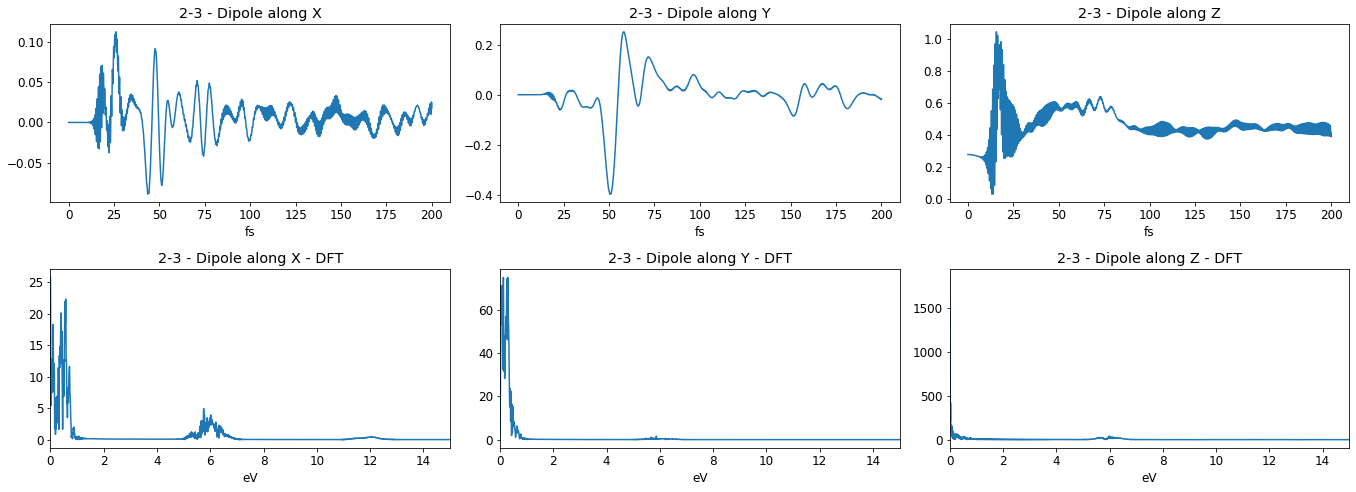

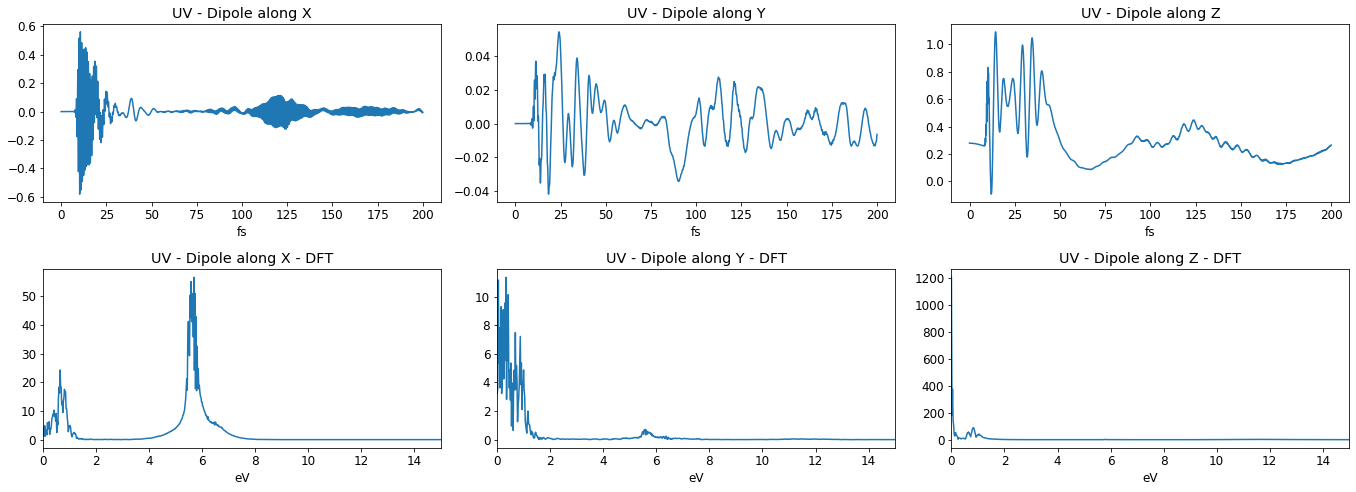

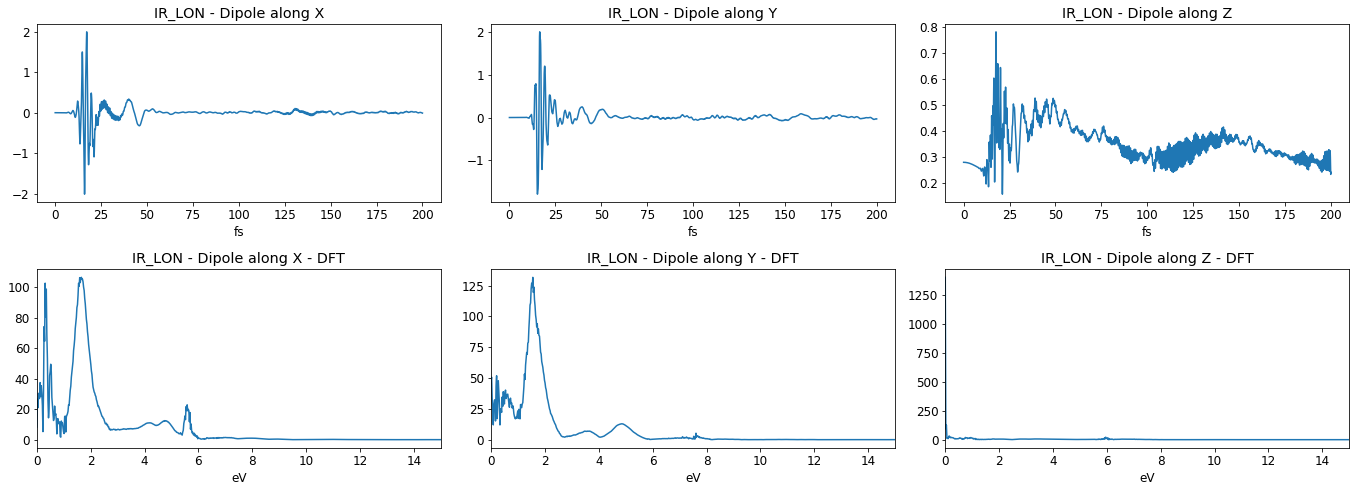

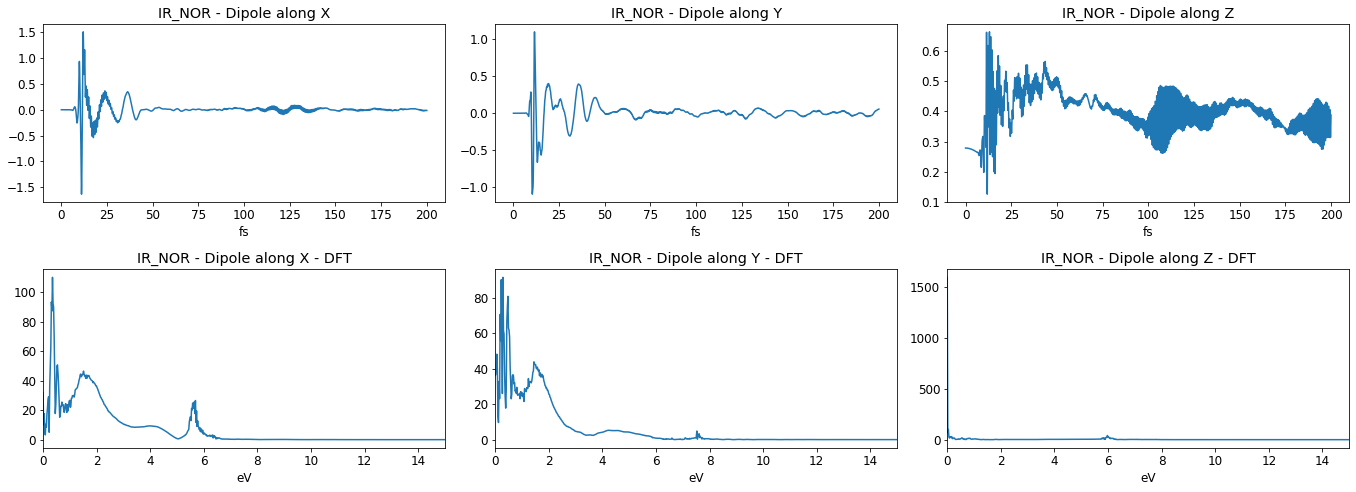

In [7]:
root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'

subfolders = ['2-3', 'UV', 'IR_LON', 'IR_NOR']
#subfolders = ['2-3']

for this in subfolders:
    abs_path = os.path.join(root, this)
    filename_abs = os.path.join(manu_root, '{}-dipole.png'.format(this.replace('_','-')))
    
    dipoles = os.path.join(abs_path, '{}_dipoles.txt'.format(this))
    dipoles_dft = os.path.join(abs_path,    '{}_dipoles_DFT.txt'.format(this))

    list_of_files = [ dipoles, dipoles_dft ]

    
    df_dipoles, df_dipoles_DFT = [ pd.read_csv(x, index_col=0) for x in list_of_files]
    
    
    fig, [[ax0, ax1, ax2],[ax3,ax4,ax5]] = plt.subplots(2,3,figsize=(19,7))

    x0 = df_dipoles['time fs']
    
    y0 = df_dipoles['dipx']    
    ax0.plot(x0,y0)
    ax0.set_title('{} - Dipole along X'.format(this))    
    ax0.set_xlabel('fs')
    
    y1 = df_dipoles['dipy']
    ax1.plot(x0,y1)
    ax1.set_title('{} - Dipole along Y'.format(this))    
    ax1.set_xlabel('fs')

    y2 = df_dipoles['dipz']
    ax2.plot(x0,y2)
    ax2.set_title('{} - Dipole along Z'.format(this))    
    ax2.set_xlabel('fs')
    
    x3 = df_dipoles_DFT['DFT-Frequencies eV']
    y3 = df_dipoles_DFT['DFT-dipx']
    ax3.plot(x3,y3)
    ax3.set_title('{} - Dipole along X - DFT'.format(this))    
    ax3.set_xlim(0,15)
    ax3.set_xlabel('eV')

    y4 = df_dipoles_DFT['DFT-dipy']
    ax4.plot(x3,y4)
    ax4.set_title('{} - Dipole along Y - DFT'.format(this))
    ax4.set_xlim(0,15)
    ax4.set_xlabel('eV')
    
    y5 = df_dipoles_DFT['DFT-dipz']
    ax5.plot(x3,y5)
    ax5.set_title('{} - Dipole along Z - DFT'.format(this))
    ax5.set_xlim(0,15)
    ax5.set_xlabel('eV')
    
    fig.tight_layout()
    fig.savefig(filename_abs)

In [8]:
df_dipoles.keys(), df_dipoles_DFT.keys()

(Index(['time fs', 'dipx', 'trans_x_0_1', 'trans_x_1_2', 'trans_x_1_3',
        'trans_x_2_4', 'trans_x_3_7', 'dipy', 'trans_y_0_1', 'trans_y_1_2',
        'trans_y_1_3', 'trans_y_1_6', 'trans_y_2_3', 'trans_y_2_7', 'dipz',
        'perm_z_0', 'perm_z_1', 'perm_z_2', 'perm_z_3', 'trans_z_0_1',
        'trans_z_0_2'],
       dtype='object'),
 Index(['DFT-Frequencies eV', 'DFT-dipx', 'DFT-trans_x_0_1', 'DFT-trans_x_1_2',
        'DFT-trans_x_1_3', 'DFT-trans_x_2_4', 'DFT-trans_x_3_7', 'DFT-dipy',
        'DFT-trans_y_0_1', 'DFT-trans_y_1_2', 'DFT-trans_y_1_3',
        'DFT-trans_y_1_6', 'DFT-trans_y_2_3', 'DFT-trans_y_2_7', 'DFT-dipz',
        'DFT-perm_z_0', 'DFT-perm_z_1', 'DFT-perm_z_2', 'DFT-perm_z_3',
        'DFT-trans_z_0_1', 'DFT-trans_z_0_2'],
       dtype='object'))

,DFT-Frequencies eV,DFT-dipx,DFT-trans_x_0_1,DFT-trans_x_1_2,DFT-trans_x_1_3,DFT-trans_x_2_4,DFT-trans_x_3_7,DFT-dipy,DFT-trans_y_0_1,DFT-trans_y_1_2,...,DFT-trans_y_1_6,DFT-trans_y_2_3,DFT-trans_y_2_7,DFT-dipz,DFT-perm_z_0,DFT-perm_z_1,DFT-perm_z_2,DFT-perm_z_3,DFT-trans_z_0_1,DFT-trans_z_0_2
0,0.000000,32.087049,1.219226,7.465327,4.291731,17.271948,1.527464,36.229795,0.014307,6.481098,...,0.441310,56.335451,2.438990,1598.857484,601.510584,156.009659,543.477289,326.680320,0.033221,1.943042
1,0.020673,10.146000,1.219007,7.061661,1.855058,2.715230,1.568973,36.679911,0.014338,3.972944,...,0.391127,45.846671,2.417934,65.597822,24.848932,13.423990,41.403005,64.460945,0.017099,1.966962
2,0.041346,17.600160,1.227466,10.584326,4.470845,4.461446,1.757797,40.863019,0.014495,6.416369,...,0.424939,44.066719,2.482658,101.022387,24.919641,39.906258,83.628517,42.467768,0.020806,1.957234
3,0.062020,7.800071,1.236468,9.132305,2.970062,6.548545,1.635387,48.248023,0.014463,7.273943,...,0.374985,33.299486,2.363628,25.644707,22.336980,14.496995,13.014573,21.427380,0.022538,1.941708
4,0.082693,3.244943,1.249327,15.058410,7.164397,5.546692,1.669535,39.741256,0.014496,1.866345,...,0.400282,9.683630,2.436633,16.232844,23.169840,9.065080,14.603258,33.877417,0.022253,1.922196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,41.263675,0.007312,0.001130,0.004321,0.006889,0.005473,0.001349,0.028322,0.000052,0.026167,...,0.000856,0.000310,0.000554,0.058057,0.067382,0.022988,0.059800,0.024290,0.000006,0.017531
1997,41.284348,0.007312,0.001130,0.004321,0.006888,0.005473,0.001349,0.028320,0.000052,0.026166,...,0.000856,0.000310,0.000554,0.058049,0.067386,0.022987,0.059797,0.024289,0.000006,0.017531
1998,41.305021,0.007311,0.001130,0.004320,0.006888,0.005472,0.001349,0.028319,0.000052,0.026165,...,0.000856,0.000310,0.000554,0.058041,0.067389,0.022986,0.059794,0.024288,0.000006,0.017530
1999,41.325694,0.007311,0.001130,0.004320,0.006888,0.005472,0.001348,0.028317,0.000052,0.026163,...,0.000855,0.000310,0.000554,0.058033,0.067393,0.022985,0.059791,0.024286,0.000006,0.017529
